<center><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Header.png" width="1200" height="627" /></center>

# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
   1.1 [**Project Overview**](#Section11)<br>
   1.2 [**Problem Statement**](#Section12)<br>
   1.3 [**Project Details**](#Section13)<br>

2. [**Data Acquisition and Preparation**](#Section2)<br>
   2.1 [**Data Sources**](#Section21)<br>
   2.2 [**Data Profiling and Pre-Processing**](#Section22)<br>

3. [**Exploratory Data Analysis**](#Section3)<br>
   3.1 [**Data Overview**](#Section31)<br>
   3.2 [**Item Sales Analysis**](#Section32)<br>
   3.3 [**Store Analysis**](#Section33)<br>
   3.4 [**Product Analysis**](#Section34)<br>

4. [**Sales Prediction Model**](#Section4)<br>
   4.1 [**Feature Selection and Engineering**](#Section41)<br>
   4.2 [**Model Development**](#Section42)<br>
   4.3 [**Model Evaluation**](#Section43)<br>

5. [**Submission**](#Section5)<br>

6. [**Evaluation Metric and Public/Private Split**](#Section6)<br>

7. [**Guidelines for Final Submission**](#Section7)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

## Project Overview

Our client for this project is Big Mart Corporation, a prominent retail organization.

- Big Mart has collected 2013 sales data for 1,559 products across 10 stores in different cities. They have also defined certain attributes for each product and store.
- The objective is to build a predictive model to forecast the sales of each product in a particular outlet.
- Big Mart aims to understand which product and store attributes significantly influence sales.

Please note that the data may contain missing values as some stores may not have reported all the data due to technical glitches. Appropriate data pre-processing will be required.

## Problem Statement

The current challenge for Big Mart Corporation is:

- Predicting the sales for each product in various outlets accurately to optimize stock management and sales strategies.

## Project Details

---
<a name = Section2></a>
# **2. Data Preparation and Acquisition**
---

<a name = Section21></a>
### **2.1 Installing and Importing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q category_encoders
!pip install -q imbalanced-learn
!pip install -q matplotlib seaborn                                 # Libraries for data visualization

In [2]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn imbalanced-learn
!pip install -q --upgrade scikit-learn imbalanced-learn

In [3]:
import pandas as pd                                                 # For data manipulation and analysis
# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)                          # Display all columns in DataFrame
pd.set_option('display.max_colwidth', None)                         # Display full width of columns
pd.set_option('display.max_rows', None)                             # Display all rows in DataFrame
pd.set_option('mode.chained_assignment', None)                      # Allow chained assignment operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # Display float values with 2 decimal places
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical computations
np.set_printoptions(precision=2, suppress=True)                     # Set numpy print options
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing StandardScaler for data normalization
from sklearn.preprocessing import LabelEncoder                      # Importing LabelEncoder for label encoding
from sklearn.preprocessing import OneHotEncoder                     # Importing OneHotEncoder for one-hot encoding
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression                   # Importing LinearRegression regressor
from sklearn.svm import SVR                                         # Importing Support Vector Regression (SVR) regressor
from sklearn.tree import DecisionTreeRegressor                      # Importing Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor                  # Importing Random Forest Regressor
from sklearn.ensemble import GradientBoostingRegressor              # Importing Gradient Boosting Regressor
from sklearn.neighbors import KNeighborsRegressor                   # Importing K-Nearest Neighbors (KNN) Regressor
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV                    # Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import train_test_split                # Importing train_test_split for data splitting
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Importing interact for creating UI controls
import warnings                                                     # Importing warning to disable runtime warnings
import multiprocessing                                              # For multiprocessing operations
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

<a name = Section22></a>
### **2.2 Data Acquisition**

In [4]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/Big%20Mart/test_AbJTz2l%20(3).csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/Big%20Mart/train_v9rqX0R%20(3).csv')

We are provided with a dataset that contains all the necessary information about products and outlets. This dataset includes the following columns:

- `Item_Identifier`: Unique product ID
- `Item_Weight`: Weight of the product
- `Item_Fat_Content`: Indicates whether the product is low fat or not
- `Item_Visibility`: The percentage of total display area allocated to the product in the store
- `Item_Type`: The category to which the product belongs
- `Item_MRP`: Maximum Retail Price (list price) of the product
- `Outlet_Identifier`: Unique store ID
- `Outlet_Establishment_Year`: The year in which the store was established
- `Outlet_Size`: The size of the store in terms of ground area covered
- `Outlet_Location_Type`: The type of city in which the store is located
- `Outlet_Type`: Specifies whether the outlet is a grocery store or a supermarket
- `Item_Outlet_Sales`: Sales of the product in the particular store (this is the target variable to be predicted).

The Train Set contains 8,523 rows and 12 columns, while the Test Set contains 5,681 rows and 11 columns. The Test Set does not include the `Item_Outlet_Sales` column, which needs to be predicted.

In [5]:
print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)

Training Data Shape: (8523, 12)
Test Data Shape: (5681, 11)

-------------------------

Training Data Head

----------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,Regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61
6,FDO10,13.65,Regular,0.01,Snack Foods,57.66,OUT013,1987,High,Tier 3,Supermarket Type1,343.55
7,FDP10,NaN,Low Fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.20,Regular,0.02,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.60
9,FDU28,19.20,Regular,0.09,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.53


<a name = Section23></a>
### **2.3 Data Description and Quality Check**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.55,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


In [8]:
df_train.skew()

Item_Weight                  0.08
Item_Visibility              1.17
Item_MRP                     0.13
Outlet_Establishment_Year   -0.40
Item_Outlet_Sales            1.18
dtype: float64

<a name = Section24></a>
### **2.4 Data Transformation and Cleaning**

In [9]:
# Extracting Categorical & Numerical columns to perform further analysis & cleaning
categorical_cols = df_train.select_dtypes('object').columns
numerical_cols = df_train.select_dtypes(['int64', 'float64']).columns

# Checking Unique Values and Null Counts in Dataset by taking a sample and displaying a few unique values
print('\n' + 'Having a look at unique values and null counts in each column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)
    null_count = df_train[col].isnull().sum()

    print(f"Column Name: {col}\n")
    if col in categorical_cols:
        print(f"Data Type: Categorical | Unique Values: {num_unique} | Null Count: {null_count}\n")
        print(unique_vals[:30])  # Display only 30 unique values for categorical columns
    else:
        print(f"Data Type: Numerical | Unique Values: {num_unique} | Null Count: {null_count}\n")
        print(df_train[col].sample(300).unique()[:10])

    print('\n' + '-'*70 + '\n')


Having a look at unique values and null counts in each column

--------------------------------------------------

Column Name: Item_Identifier

Data Type: Categorical | Unique Values: 1559 | Null Count: 0

['FDA15' 'DRC01' 'FDN15' 'FDX07' 'NCD19' 'FDP36' 'FDO10' 'FDP10' 'FDH17'
 'FDU28' 'FDY07' 'FDA03' 'FDX32' 'FDS46' 'FDF32' 'FDP49' 'NCB42' 'DRI11'
 'FDU02' 'FDN22' 'FDW12' 'NCB30' 'FDC37' 'FDR28' 'NCD06' 'FDV10' 'DRJ59'
 'FDE51' 'FDC14' 'FDV38']

----------------------------------------------------------------------

Column Name: Item_Weight

Data Type: Numerical | Unique Values: 416 | Null Count: 1463

[ 4.92  7.63 12.6  19.35 20.5   6.04 20.25  6.12 20.85  8.89]

----------------------------------------------------------------------

Column Name: Item_Fat_Content

Data Type: Categorical | Unique Values: 5 | Null Count: 0

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

----------------------------------------------------------------------

Column Name: Item_Visibility

Data Type: Nume

In [10]:
# Replace various categories in 'Item_Fat_Content' column in df_train
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].str.lower()  # Convert to lowercase for uniformity
df_train['Item_Fat_Content'].replace({'low fat': 'low fat', 'lf': 'low fat', 'reg': 'regular'}, inplace=True)

# Replace various categories in 'Item_Fat_Content' column in df_test
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].str.lower()  # Convert to lowercase for uniformity
df_test['Item_Fat_Content'].replace({'lf': 'low fat', 'reg': 'regular'}, inplace=True)

# Verify the changes
print("Unique values in 'Item_Fat_Content' (df_train):", df_train['Item_Fat_Content'].unique())
print("Unique values in 'Item_Fat_Content' (df_test):", df_test['Item_Fat_Content'].unique())

Unique values in 'Item_Fat_Content' (df_train): ['low fat' 'regular']
Unique values in 'Item_Fat_Content' (df_test): ['low fat' 'regular']


### Handle missing values

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation 
The "Item_Weight" & "Outlet_Size" columns contain missing values (NaN). We need to decide how to handle these missing values. 

In [12]:
# Get the unique values in the entire DataFrame
original_unique_counts = {col: df_train[col].nunique() for col in df_train.columns}

# Filter the subset of data with missing "Item_Weight"
subset_with_missing_item_weight = df_train[df_train['Item_Weight'].isnull()]

# Get unique values in the subset
subset_unique_counts = {col: subset_with_missing_item_weight[col].nunique() for col in df_train.columns}

# Create a DataFrame from the unique counts
unique_counts_df = pd.DataFrame({
    'Column Name': df_train.columns,
    'Unique Values (Original)': original_unique_counts.values(),
    'Unique Values (Subset with Missing Item_Weight)': subset_unique_counts.values()
})

unique_counts_df

,Column Name,Unique Values (Original),Unique Values (Subset with Missing Item_Weight)
0,Item_Identifier,1559,1142
1,Item_Weight,415,0
2,Item_Fat_Content,2,2
3,Item_Visibility,7880,1362
4,Item_Type,16,16
5,Item_MRP,5938,1371
6,Outlet_Identifier,10,2
7,Outlet_Establishment_Year,9,1
8,Outlet_Size,3,2
9,Outlet_Location_Type,3,2


### Observation 

- In the "Outlet_Establishment_Year" column, there's only one unique value in the subset with missing "Item_Weight," indicating that all items with missing weights are associated with outlets established in the same year. This suggests that there might be a reason for these missing values specific to that year.

- In the "Outlet_Size" column, there are two unique values in the subset with missing "Item_Weight." This information indicates that not all outlets of the same establishment year and with missing item weights have the same size.

In [13]:
# Extract the specific year with missing "Item_Weight"
missing_weight_year = subset_with_missing_item_weight['Outlet_Establishment_Year'].iloc[0]

missing_weight_year

1985

In [14]:
# Get the unique values in the entire DataFrame
original_unique_counts = {col: df_train[col].nunique() for col in df_train.columns}

# Filter the subset of data with missing "Item_Weight"
subset_with_missing_outlet_size = df_train[df_train['Outlet_Size'].isnull()]

# Get unique values in the subset
subset_unique_counts = {col: subset_with_missing_outlet_size[col].nunique() for col in df_train.columns}

# Create a DataFrame from the unique counts
unique_counts_df = pd.DataFrame({
    'Column Name': df_train.columns,
    'Unique Values (Original)': original_unique_counts.values(),
    'Unique Values (Subset with Missing Outlet_Size)': subset_unique_counts.values()
})

unique_counts_df

,Column Name,Unique Values (Original),Unique Values (Subset with Missing Outlet_Size)
0,Item_Identifier,1559,1393
1,Item_Weight,415,393
2,Item_Fat_Content,2,2
3,Item_Visibility,7880,2240
4,Item_Type,16,16
5,Item_MRP,5938,2178
6,Outlet_Identifier,10,3
7,Outlet_Establishment_Year,9,3
8,Outlet_Size,3,0
9,Outlet_Location_Type,3,2


In [15]:
# Extract the unique years with missing "Outlet_Size"
missing_osize_years = subset_with_missing_outlet_size['Outlet_Establishment_Year'].unique()

missing_osize_years

array([1998, 2002, 2007])

### Observations

- From the unique values in the "Outlet_Establishment_Year" column, we observe that the company established outlets in the following years: [2004, 1987, 2002, 1985, 1999, 2007, 1997, 2009, 1998].

- Upon closer examination, we find interesting patterns related to the missing values in the dataset:

- Outlets Established in 1985: There are two outlets that were established in 1985. These outlets tend to have missing values in the "Item_Weight" column. This suggests that there may be a specific reason for the missing item weights associated with outlets from this year.

- Outlets Established in 1998, 2002, and 2007: Three outlets opened in 1998, one in 2002, and one in 2007. These outlets often have missing values in the "Outlet_Size" column. This pattern could indicate a common factor or specific circumstances related to the missing outlet sizes for outlets established in these years.

---
<a name = Section3></a>
# **3. Exploratory Data Analysis**
---

<a name = Section31></a>
### **3.1 Overview of Data**

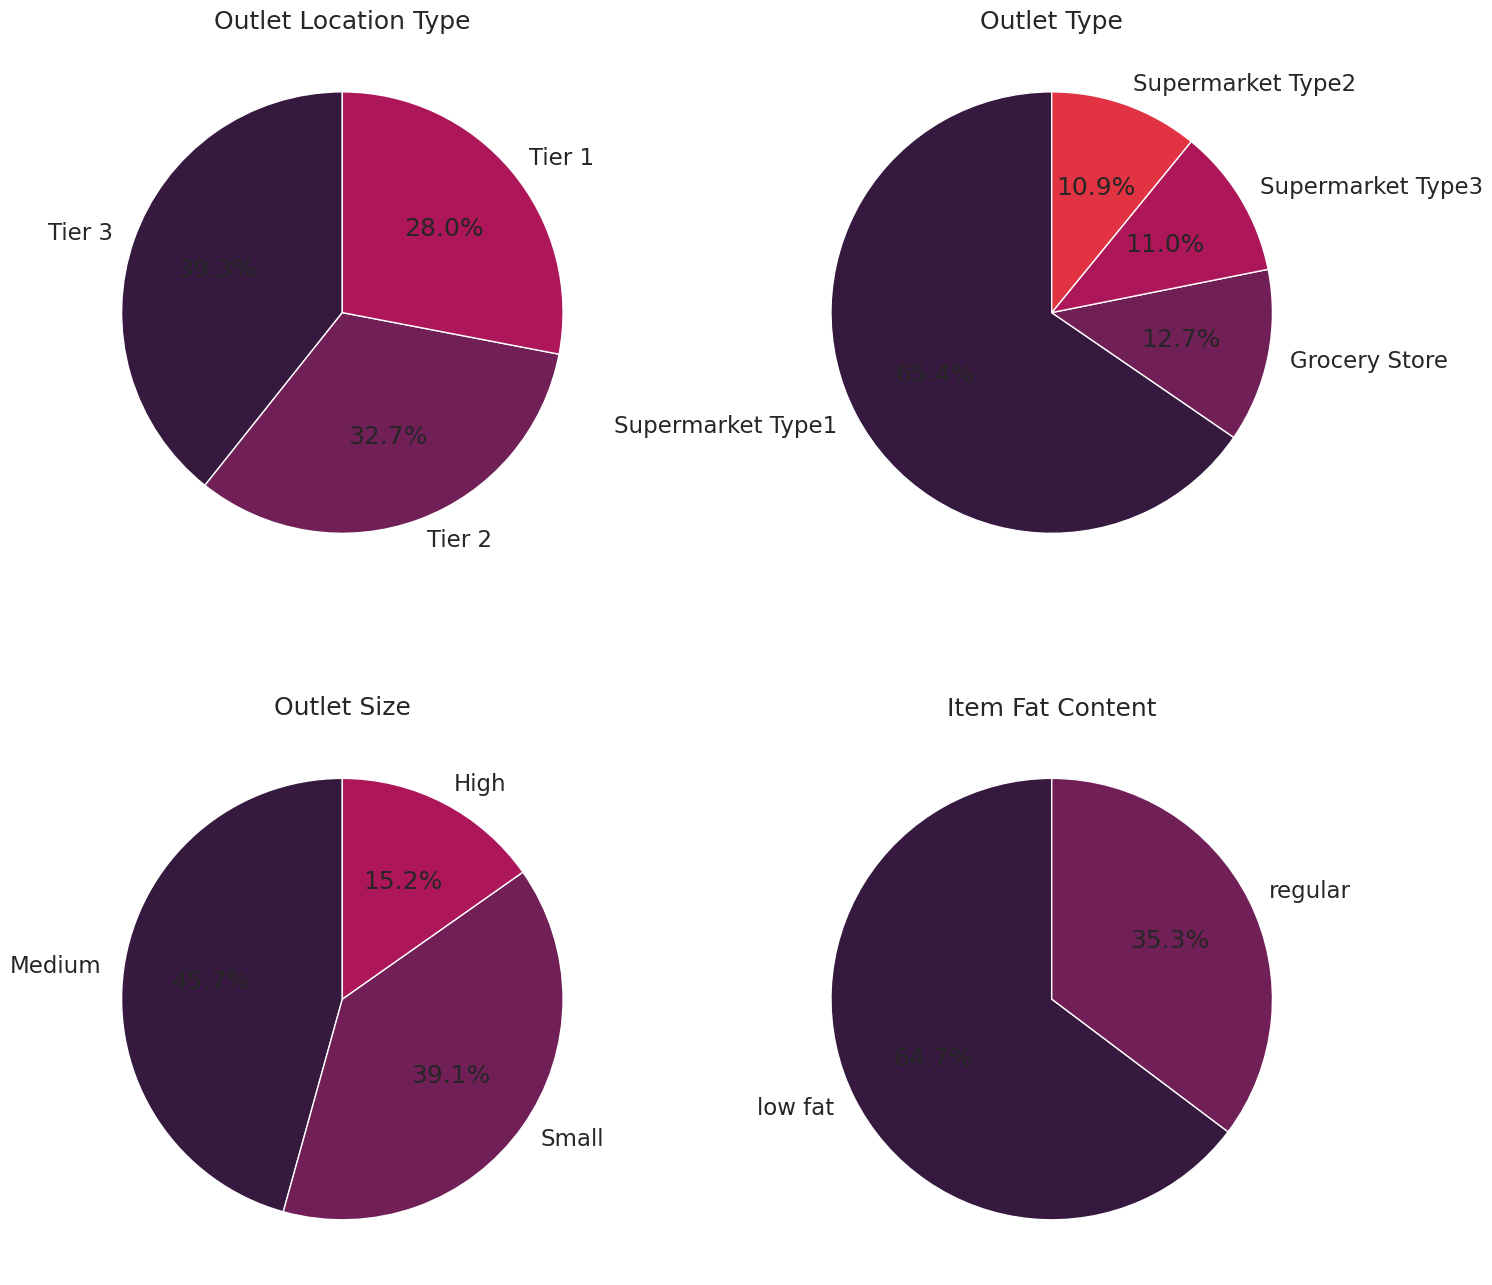

In [17]:
# Set the style of the plots
sns.set(style="whitegrid", font_scale=1.5, rc={"axes.labelsize": 16})

# Define the rocket color palette
rocket_palette = sns.color_palette("rocket")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 14))

# Plot 2: Outlet Location Type
outlet_location_counts = df_train['Outlet_Location_Type'].value_counts()
axes[0, 0].pie(outlet_location_counts, labels=outlet_location_counts.index, autopct='%1.1f%%', startangle=90, colors=rocket_palette)
axes[0, 0].set_title('Outlet Location Type', size=18)

# Plot 3: Outlet Type
outlet_type_counts = df_train['Outlet_Type'].value_counts()
axes[0, 1].pie(outlet_type_counts, labels=outlet_type_counts.index, autopct='%1.1f%%', startangle=90, colors=rocket_palette)
axes[0, 1].set_title('Outlet Type', size=18)

# Plot 4: Outlet Size
outlet_size_counts = df_train['Outlet_Size'].value_counts()
axes[1, 0].pie(outlet_size_counts, labels=outlet_size_counts.index, autopct='%1.1f%%', startangle=90, colors=rocket_palette)
axes[1, 0].set_title('Outlet Size', size=18)

# Plot 5: Item Fat Content
item_fat_content_counts = df_train['Item_Fat_Content'].value_counts()
axes[1, 1].pie(item_fat_content_counts, labels=item_fat_content_counts.index, autopct='%1.1f%%', startangle=90, colors=rocket_palette)
axes[1, 1].set_title('Item Fat Content', size=18)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

<a name = Section33></a>
### **3.2 Item Visibility Distribution**

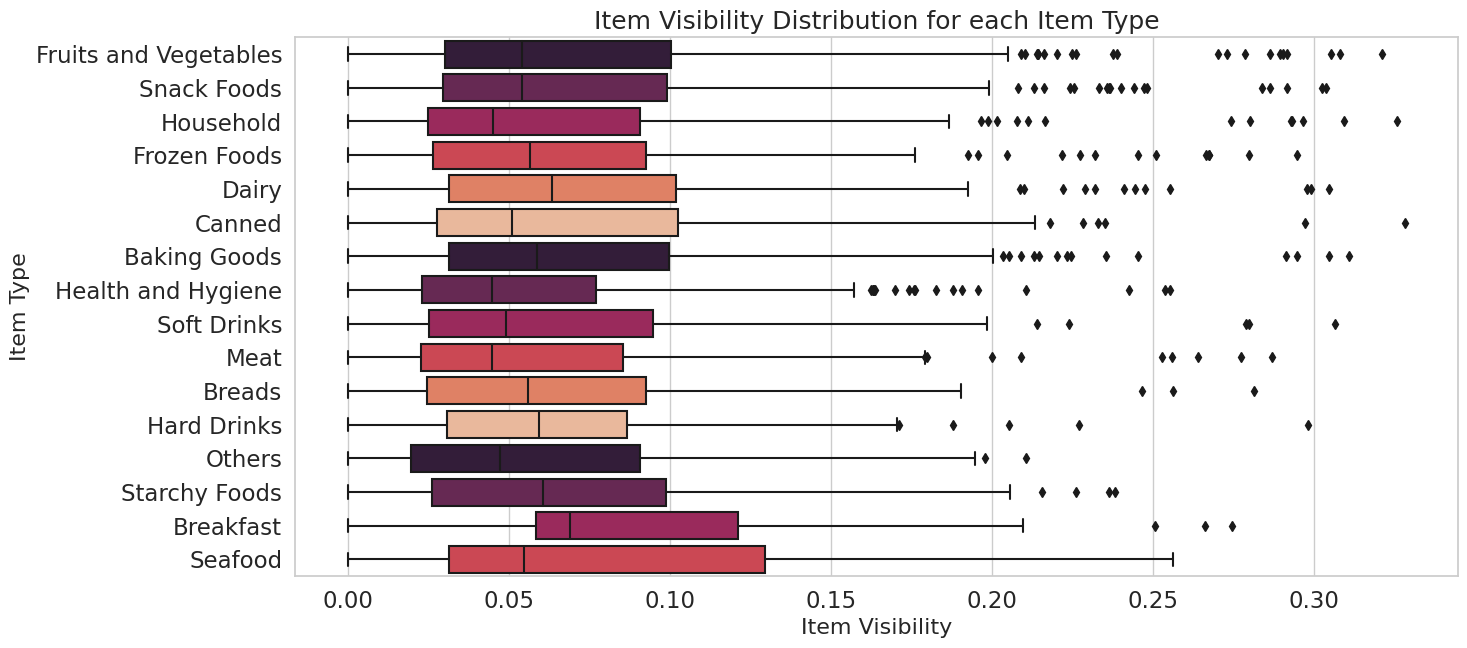

In [18]:
# Set the style of the plots
sns.set(style="whitegrid", font_scale=1.5, rc={"axes.labelsize": 16})

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

# Define the rocket color palette
rocket_palette = sns.color_palette("rocket")

# Plot: Item Visibility Distribution for each Item Type with orientation changed
sns.boxplot(data=df_train, x='Item_Visibility', y='Item_Type', ax=ax, order=df_train['Item_Type'].value_counts().index, palette=rocket_palette)
ax.set_title('Item Visibility Distribution for each Item Type', size=18)
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Item Type')

# Show the plot
plt.show()

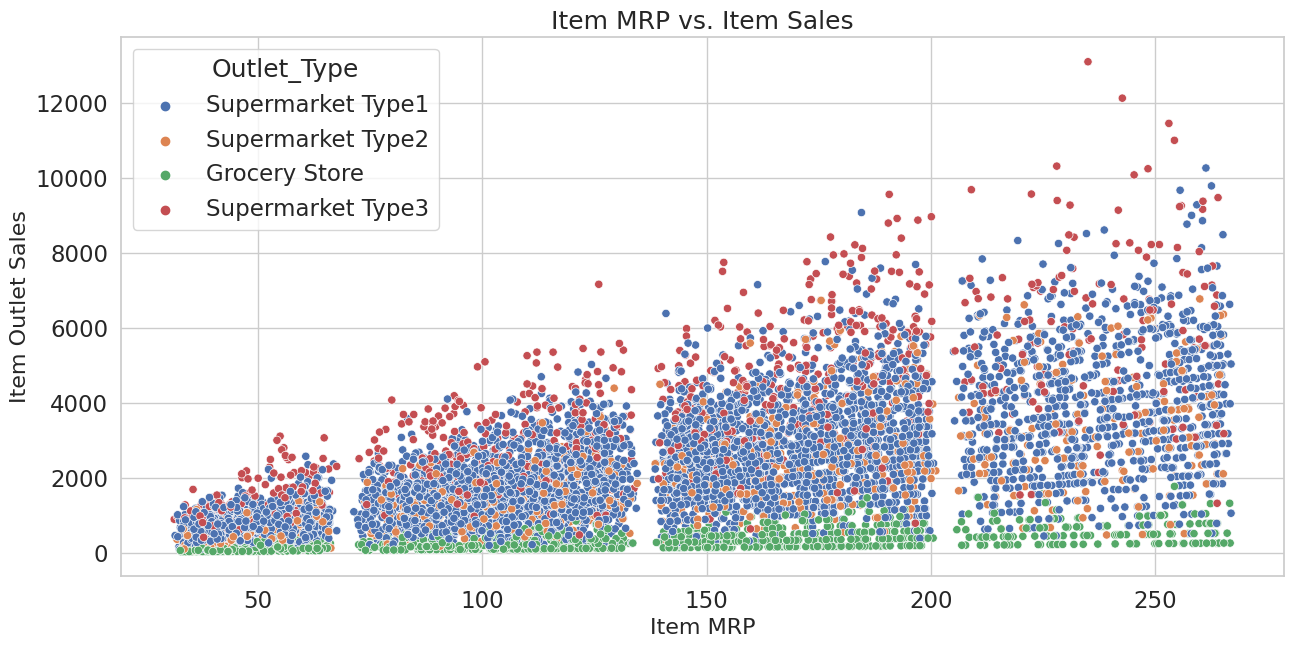

In [19]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a plot for Item MRP vs. Item Sales
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_train, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Item MRP vs. Item Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

---
<a name = Section4></a>
# **4. Prediction Model**
---

In [20]:
# Making a copy of the Dataset incase it needs to be reffered back to
df_train_og = df_train.copy(deep=True)
df_test_og = df_test.copy(deep=True)

In [21]:
print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)

Training Data Shape: (8523, 12)
Test Data Shape: (5681, 11)

-------------------------

Training Data Head

----------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,low fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,low fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61
6,FDO10,13.65,regular,0.01,Snack Foods,57.66,OUT013,1987,High,Tier 3,Supermarket Type1,343.55
7,FDP10,NaN,low fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
8,FDH17,16.20,regular,0.02,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.60
9,FDU28,19.20,regular,0.09,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.53


In [22]:
# Split the data into X (features) and y (target variable), dropping 'employee_id'
X = df_train.drop(['Item_Outlet_Sales'], axis=1)
y = df_train['Item_Outlet_Sales']

In [23]:
X = X.drop(['Item_Identifier'], axis=1)
df_test = df_test.drop(['Item_Identifier'], axis=1)

In [24]:
X.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<a name = Section41></a>
### **4.1 Feature Selection with Correlation Matrix**

In [25]:
# Create a correlation matrix between all features and status
corr_matrix = X.corrwith(y)

# Split the correlations into two lists based on positive or negative correlation
neg_corr = corr_matrix[corr_matrix > 0].sort_values(ascending=False)
pos_corr = corr_matrix[corr_matrix < 0].sort_values()

# Multiply the correlations by 100 to express them as percentages
neg_corr = neg_corr * 100
pos_corr = pos_corr * -100

# Print the results
print("Sorted list of Negatively correlated features with sales (in percentage):\n")
print(neg_corr)
print("\nSorted List of Positively correlated features with sales (in percentage):\n")
print(pos_corr)

Sorted list of Negatively correlated features with sales (in percentage):

Item_MRP      56.76
Item_Weight    1.41
dtype: float64

Sorted List of Positively correlated features with sales (in percentage):

Item_Visibility             12.86
Outlet_Establishment_Year    4.91
dtype: float64


In [26]:
# Set the threshold for dropping columns
threshold = 4

# Identify the columns below the threshold and drop them
columns_to_drop = neg_corr[neg_corr < threshold].index.tolist() + pos_corr[pos_corr < threshold].index.tolist()

# Drop the columns only if they exist in the dataset
X = X.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

# Print the updated dataset
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,low fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,low fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store
4,low fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1


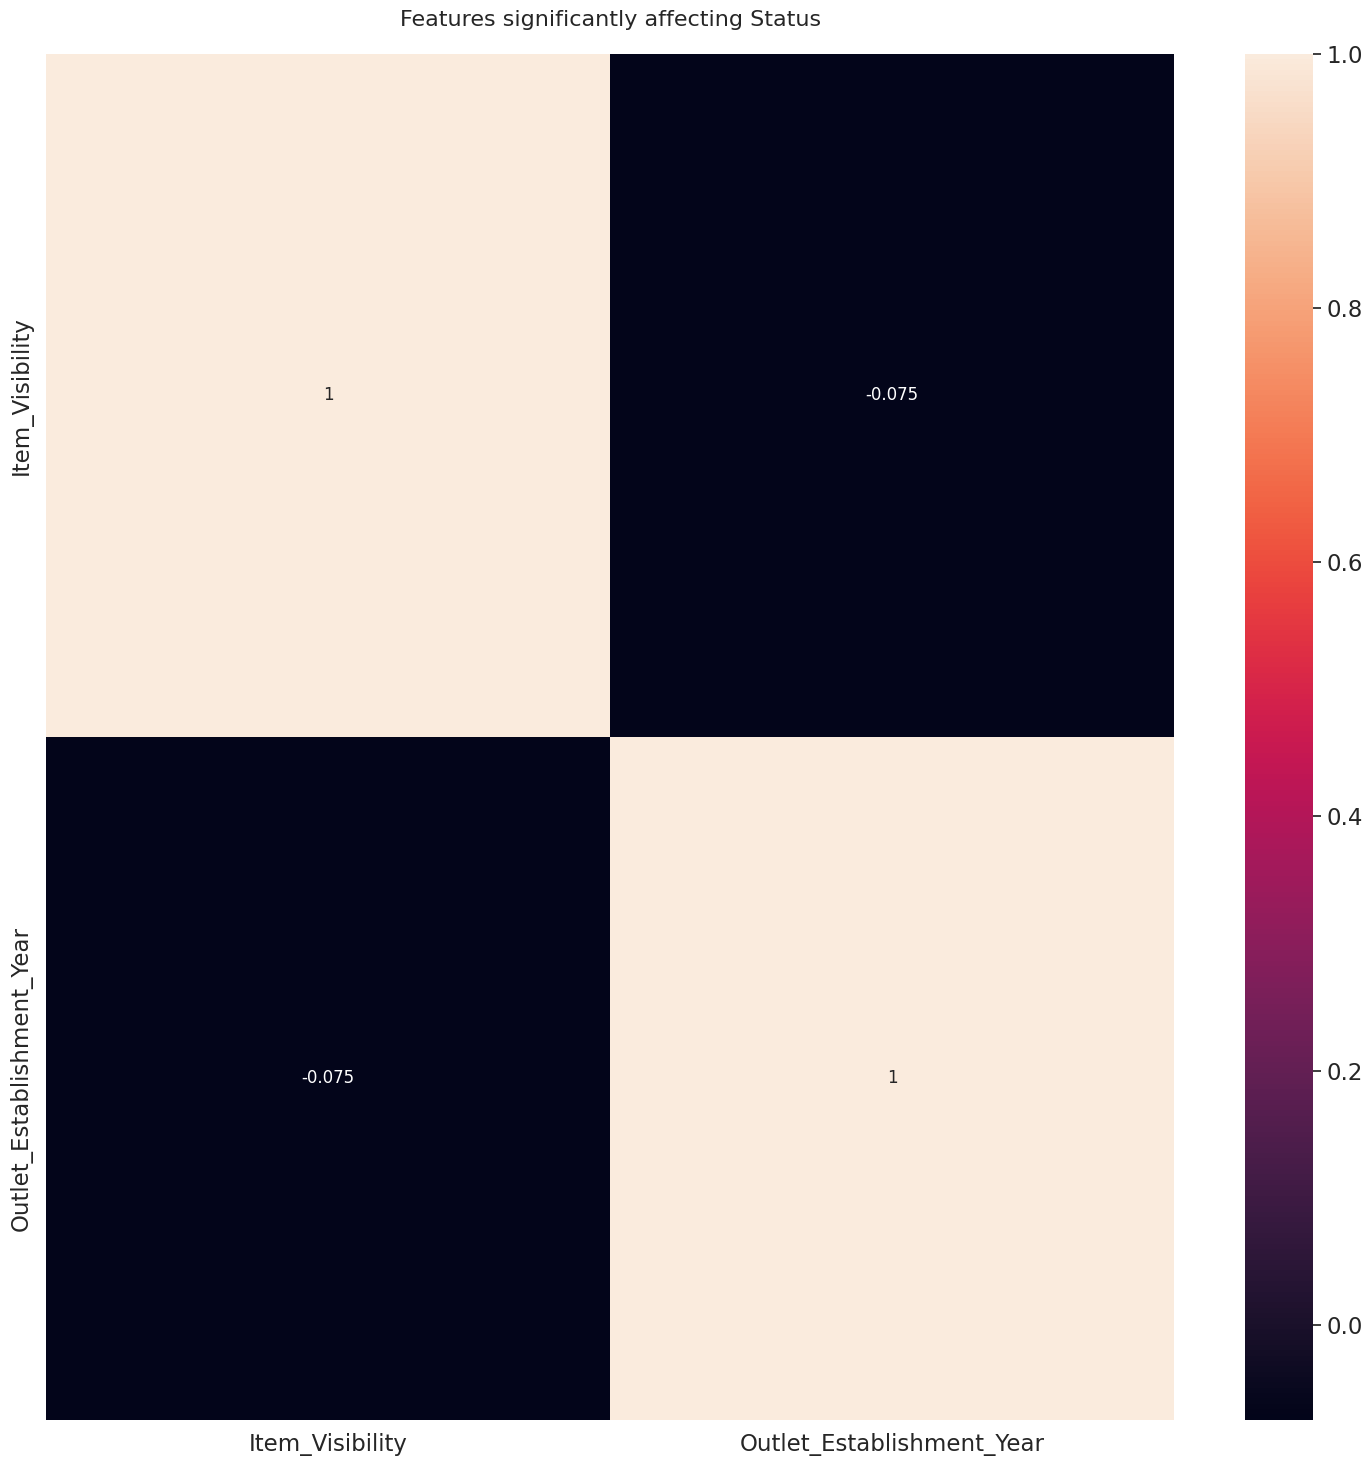

In [27]:
# Updating the pos_corr list to exclude features not present in X
pos_corr = pos_corr[pos_corr.index.isin(X.columns)]

# Set figure size
plt.figure(figsize=(15, 15))

# Plot heatmap of positively correlated features with net worth
sns.heatmap(X[pos_corr.index].corr(), annot=True, cmap='rocket', annot_kws={'fontsize': 12})
plt.title('Features significantly affecting Status', fontsize=16, pad=20)

# Adjust the plot layout
plt.tight_layout()
plt.show()

<a name = Section42></a>
### **4.2 Encoding Categorical Variables**

In [28]:
# Combine 'X' and 'df_test' to fit the label encoder
combined_data = pd.concat([X, df_test], axis=0)

# Initialize label encoder for binary/ordinal columns
label_encoder = LabelEncoder()

# List of columns to one-hot encode
one_hot_cols = []

# Identify the categorical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

# Iterate through the categorical columns
for col in categorical_cols:
    if col not in one_hot_cols:  # Skip the columns already included in one-hot encoding
        unique_values = combined_data[col].unique()
        num_unique = len(unique_values)

        # Define a threshold for one-hot encoding (set to 2 for binary or columns with up to 2 unique values)
        one_hot_threshold = 2

        if num_unique <= one_hot_threshold:
            # Use label encoding for binary or columns with up to 2 unique values
            combined_data[col] = label_encoder.fit_transform(combined_data[col])
        else:
            # Add to the list of columns to one-hot encode
            one_hot_cols.append(col)

# Perform one-hot encoding for columns in one_hot_cols
combined_data = pd.get_dummies(combined_data, columns=one_hot_cols, drop_first=True)

# Split the combined data back into 'X' and 'df_test'
X = combined_data.iloc[:X.shape[0], :]
df_test = combined_data.iloc[X.shape[0]:, :]

<a name = Section44></a>
### **4.4 Feature Scaling**

In [29]:
# Create a scaler object
scaler = StandardScaler()

# Extract numerical columns for scaling
numerical_cols = X.select_dtypes(['int', 'float']).columns

# Scale the numerical columns in the training data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Scale the numerical columns in the test data
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

---
<a name = Section5></a>
# **5. Model Development & Evaluation**
---

<a name = Section51></a>
### **5.1 Splitting Data and Initializing Classifiers**

In [30]:
# Split the data into training and development sets
x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=77)

In [31]:
# Initialize regressors
lr_reg = LinearRegression()
svr_reg = SVR()
dt_reg = DecisionTreeRegressor(random_state=77)
rf_reg = RandomForestRegressor(n_estimators=500, random_state=77, n_jobs=-1)
gb_reg = GradientBoostingRegressor(n_estimators=500, random_state=77)
knn_reg = KNeighborsRegressor()

<a name = Section52></a>
### **5.2 Training Classifiers and Evaluating F1 Scores**

In [32]:
%%time
# Initialize a list of regressor objects
reg_list = [lr_reg, svr_reg, dt_reg, rf_reg, gb_reg, knn_reg]

# Create an empty list to append R2 scores and regressor names
train_r2_scores = []
dev_r2_scores = []
reg_names = []

# Train regressors over the train data and append R2 scores to the empty lists
for reg in reg_list:
    # Fit the train data to the regressor object
    reg.fit(x_train, y_train)
  
    # Predict the train and dev labels
    train_preds = reg.predict(x_train)
    dev_preds = reg.predict(x_dev)

    # Calculate the train and dev R2 scores
    train_r2 = r2_score(y_train, train_preds)
    dev_r2 = r2_score(y_dev, dev_preds)
    
    # Append train and dev R2 scores to the empty lists
    train_r2_scores.append(np.round(a=train_r2, decimals=4))
    dev_r2_scores.append(np.round(a=dev_r2, decimals=4))
    reg_names.append(reg.__class__.__name__)

CPU times: user 23 s, sys: 538 ms, total: 23.5 s
Wall time: 11.8 s


<a name = Section51></a>
### **5.3 Selecting the Best Classifier**

In [33]:
# Create an R2 score dataframe from the scores and names list
r2_score_frame = pd.DataFrame(data={'Training Set R2 Scores': train_r2_scores, 'Dev Set R2 Scores': dev_r2_scores}, index=reg_names)

# View the R2 scores of all the regressors
r2_score_frame.transpose()

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,KNeighborsRegressor
Training Set R2 Scores,0.56,0.06,1.00,0.94,0.72,0.67
Dev Set R2 Scores,0.56,0.06,0.18,0.55,0.58,0.52


In [34]:
# Find the index of the regressor with the highest dev R2 score
best_index = np.argmax(dev_r2_scores)
best_regressor_name = reg_names[best_index]
best_regressor = reg_list[best_index]

<a name = Section54></a>
### **5.4 Hyper-parameter tuning with Gridsearch**

In [35]:
# Define hyperparameter grids for the best regressor
param_grid = {}

if best_regressor_name == 'LinearRegression':
    param_grid = {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    }
elif best_regressor_name == 'SVR':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
elif best_regressor_name == 'DecisionTreeRegressor':
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_regressor_name == 'RandomForestRegressor':
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_regressor_name == 'GradientBoostingRegressor':
    param_grid = {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
elif best_regressor_name == 'KNeighborsRegressor':
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }

# Initialize GridSearchCV for the best regressor
grid_search = GridSearchCV(best_regressor, param_grid, cv=5, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=500,
                                                 random_state=77),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='r2')

In [36]:
# Use the best regressor after grid search to predict on the dev set
best_regressor_tuned = grid_search.best_estimator_
dev_predictions = best_regressor_tuned.predict(x_dev)

# Calculate evaluation metrics
mse = mean_squared_error(y_dev, dev_predictions)
r2 = r2_score(y_dev, dev_predictions)

# Print the metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1163350.5448326636
R2 Score: 0.5983057749224246


---
<a name = Section6></a>
# **6. Submission**
---

In [37]:
# Use the best regressor after grid search to predict on df_test
test_predictions = best_regressor_tuned.predict(df_test)

# Create a new DataFrame for submission
submission_df = pd.DataFrame()

# Add 'employee_id' column from df_test_og to the submission DataFrame
submission_df['Item_Identifier'] = df_test_og['Item_Identifier']

# Add the predicted values column to the submission DataFrame
submission_df['Item_Outlet_Sales'] = test_predictions

# Save the submission DataFrame to a CSV file without index and header
submission_df.to_csv('submission.csv', index=False, header=False)

---
<a name = Section7></a>
# **7. Recommendations and Action Plan**
---

<center>
  <a href="https://thedatascienceguy.go.studio/">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Footer.png" width="1200" height="627" />
  </a>
</center>